## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing raw train and test set

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 
final = test['PassengerId']
final

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

## Preprocessing

In [3]:
# Checking missing values in train set
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train.shape

(891, 12)

In [5]:
# Checking missing values in test set
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
test.shape

(418, 11)

In [7]:
# Replacing "" to NaN in train
train.replace('', np.nan, inplace = True)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Replacing "" to NaN in test
test.replace('', np.nan, inplace = True)
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# Checking missing values in train set
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# To see how many values are present in each label of Embarked column
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# It is shwon that S is mode so we will replace all NaN values of column Embarked with 'S'
# replacing the missing 'Embarked' values by the most frequent 'S'
train["Embarked"].replace(np.nan, "S", inplace=True)
test["Embarked"].replace(np.nan, "S", inplace=True)

In [12]:
# Finding average age of all passengers train set
avg_age_train = train['Age'].astype('float').mean(axis=0)
print("Average Age in train set:", avg_age_train)

Average Age in train set: 29.69911764705882


In [13]:
# Finding average age of all passengers in test set
avg_age_test = test['Age'].astype('float').mean(axis=0)
print("Average Age in test set:", avg_age_test)

Average Age in test set: 30.272590361445783


In [14]:
# Replacing NaN values of Age column by the average age
train['Age'].replace(np.nan, avg_age_train, inplace=True)
test['Age'].replace(np.nan, avg_age_test, inplace=True)

In [15]:
# Dropping cabin columns in train and test

train.drop(['Cabin','Name','Ticket','PassengerId'], axis=1, inplace = True)
test.drop(['Cabin','Name','Ticket','PassengerId'], axis=1, inplace = True)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
# Replacing rows of fare column in test set where values are NaN with average
# finding average age of all passengers in test set
avg_fare_test = test['Fare'].astype('float').mean(axis=0)
print("Average Fare in test set:", avg_fare_test)

Average Fare in test set: 35.627188489208635


In [17]:
# Replacing NaN values of Fare column by the average Fare
test['Fare'].replace(np.nan, avg_fare_test, inplace=True)

In [18]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [19]:
# Checking datatypes of all values in columns of train set
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## Replacing categorical values of Sex column by dummy variables

In [20]:
dummy_variable_1_train = pd.get_dummies(train["Sex"])
dummy_variable_1_test = pd.get_dummies(test["Sex"])

In [21]:
# merge data frame "df" and "dummy_variable_1" 
train = pd.concat([train, dummy_variable_1_train], axis=1)
test = pd.concat([test, dummy_variable_1_test], axis=1)
# drop original column "Sex" from "train and test"
train.drop("Sex", axis = 1, inplace=True)
test.drop("Sex", axis = 1, inplace=True)

## Replacing categorical values of Embarked column by dummy variables

In [22]:
dummy_variable_2_train = pd.get_dummies(train["Embarked"])
dummy_variable_2_test = pd.get_dummies(test["Embarked"])

In [23]:
# merge data frame "df" and "dummy_variable_1" 
train = pd.concat([train, dummy_variable_2_train], axis=1)
test = pd.concat([test, dummy_variable_2_test], axis=1)
# drop original column "fuel-type" from "df"
train.drop("Embarked", axis = 1, inplace=True)
test.drop("Embarked", axis = 1, inplace=True)

In [24]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [25]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


## Splitting the dataset into the Training set and Test set

In [26]:
X_train = train.iloc[:,1:].values
y_train = train.iloc[:,0].values

In [27]:
X_test = test.iloc[:,:]
X_test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
female    0
male      0
C         0
Q         0
S         0
dtype: int64

In [28]:
X_test.shape

(418, 10)

### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Further splitting X_train into X_train_train and X_train_test for gaining more insights

In [30]:
from sklearn.model_selection import train_test_split
X_train_train,X_train_test,y_train_train,y_train_test = train_test_split(X_train,y_train, test_size = 0.25, random_state = 42)


In [31]:
X_train_train

array([[-1.56610693,  0.        , -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       [ 0.82737724, -0.36161755, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-0.36936484, -0.4385719 , -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724,  0.86965206,  1.34013193, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -1.20811541,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.66943495, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843]])

In [32]:
X_train_test

array([[ 0.82737724,  0.        ,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [-0.36936484,  0.10010856, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       [ 0.82737724, -0.7463893 , -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724,  0.        , -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-0.36936484, -0.4385719 , -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       [ 0.82737724, -0.900298  ,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843]])

In [33]:
y_train_train

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [34]:
y_train_test

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [35]:
X_train_test.shape

(223, 10)

### Applying Artificial Neural Network

In [36]:
# intitializing ann
import tensorflow as tf
ann = tf.keras.models.Sequential() 

In [37]:
# input layer and hidden layer 1
ann.add(tf.keras.layers.Dense(units = 14, activation = 'relu'))

In [38]:
#Hidden layer 2
ann.add(tf.keras.layers.Dense(units = 14, activation = 'relu'))

In [39]:
# Output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [40]:
# Optimizing by Adam Optimizer, 'binary_crossentropy' is selected as Loss function
# accuracy is selected as metrics
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
# Fitting X_train_train and y_train_train in our model
ann.fit(X_train_train, y_train_train, batch_size = 8, epochs = 100)

Train on 668 samples
Epoch 1/100
668/668 [==============================] - 1s 2ms/sample - loss: 0.6683 - accuracy: 0.6183
Epoch 2/100
668/668 [==============================] - 0s 228us/sample - loss: 0.5425 - accuracy: 0.7725
Epoch 3/100
668/668 [==============================] - 0s 228us/sample - loss: 0.4728 - accuracy: 0.7979
Epoch 4/100
668/668 [==============================] - 0s 251us/sample - loss: 0.4521 - accuracy: 0.7994
Epoch 5/100
668/668 [==============================] - 0s 263us/sample - loss: 0.4432 - accuracy: 0.8069
Epoch 6/100
668/668 [==============================] - 0s 251us/sample - loss: 0.4372 - accuracy: 0.8069
Epoch 7/100
668/668 [==============================] - 0s 192us/sample - loss: 0.4325 - accuracy: 0.8114
Epoch 8/100
668/668 [==============================] - 0s 204us/sample - loss: 0.4283 - accuracy: 0.8159
Epoch 9/100
668/668 [==============================] - 0s 192us/sample - loss: 0.4266 - accuracy: 0.8174
Epoch 10/100
668/668 [==============

## Predicting the Train set results

In [42]:
y_pred_train = ann.predict(X_train_train)

In [43]:
# Threshold is set to 0.5
y_pred_train = (y_pred_train > 0.5)

## Confusion Matrix and Accuracy Score

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(y_train_train, y_pred_train)
print("Confusion Matrix:", cm1)
print("Accuracy of the model is", accuracy_score(y_train_train, y_pred_train))

Confusion Matrix: [[394  21]
 [ 78 175]]
Accuracy of the model is 0.8517964071856288


## Plotting Confusion Matrix

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Defining th function for plotting Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Train Set Accuracy and Confusion Matrix

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       415
           1       0.89      0.69      0.78       253

    accuracy                           0.85       668
   macro avg       0.86      0.82      0.83       668
weighted avg       0.86      0.85      0.85       668

Confusion matrix, without normalization
[[394  21]
 [ 78 175]]


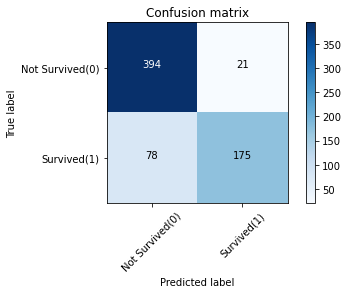

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train_train, y_pred_train, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_train_train, y_pred_train))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Survived(0)','Survived(1)'], normalize= False,  title='Confusion matrix')

## Predicting the Test set results

In [47]:
y_pred = ann.predict(X_train_test)

In [48]:
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_train_test.reshape(len(y_train_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train_test, y_pred)
print(cm)
accuracy_score(y_train_test, y_pred)

[[126   8]
 [ 25  64]]


0.852017937219731

## Test Set Accuracy and Confusion Matrix

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       134
           1       0.89      0.72      0.80        89

    accuracy                           0.85       223
   macro avg       0.86      0.83      0.84       223
weighted avg       0.86      0.85      0.85       223

Confusion matrix, without normalization
[[126   8]
 [ 25  64]]


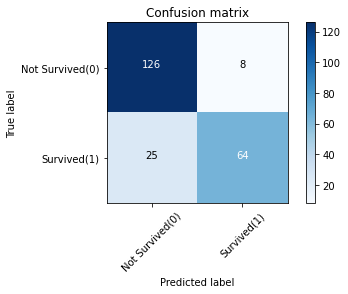

In [50]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_train_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Survived(0)','Survived(1)'],normalize= False,  title='Confusion matrix')

## Prediction of X_test

In [51]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred = y_pred.reshape(len(y_pred),1)

In [52]:
passangerid = np.asarray(final)
passangerid = passangerid.reshape(len(passangerid),1)

In [53]:
# Final result for the test set
final_array = np.concatenate((passangerid, y_pred),axis=1)
final_array

# NOTE - By submitting this result to Kaggle's Machine Learning Problem I got 0.78468 Accuracy

array([[ 892,    0],
       [ 893,    0],
       [ 894,    0],
       [ 895,    0],
       [ 896,    0],
       [ 897,    0],
       [ 898,    1],
       [ 899,    0],
       [ 900,    1],
       [ 901,    0],
       [ 902,    0],
       [ 903,    0],
       [ 904,    1],
       [ 905,    0],
       [ 906,    1],
       [ 907,    1],
       [ 908,    0],
       [ 909,    0],
       [ 910,    0],
       [ 911,    0],
       [ 912,    0],
       [ 913,    1],
       [ 914,    1],
       [ 915,    1],
       [ 916,    1],
       [ 917,    0],
       [ 918,    1],
       [ 919,    0],
       [ 920,    0],
       [ 921,    0],
       [ 922,    0],
       [ 923,    0],
       [ 924,    0],
       [ 925,    0],
       [ 926,    0],
       [ 927,    0],
       [ 928,    0],
       [ 929,    0],
       [ 930,    0],
       [ 931,    0],
       [ 932,    0],
       [ 933,    0],
       [ 934,    0],
       [ 935,    1],
       [ 936,    1],
       [ 937,    0],
       [ 938,    0],
       [ 939,